In [20]:
import pandas as pd
car_df = pd.read_csv('cars-dataset.csv')

In [7]:
#car_df['hp'].value_counts()
# On analyzing found that HP column has 6 rows with '?'. Further checked that the missing HP rows has car weight
# on higher side. Considering the weight is having positive correlation with HP hence replacing the ? with max 
# value of HP

In [21]:
car_df['hp'] = car_df['hp'].replace('?',0)
car_df['hp'] = car_df['hp'].astype('int')

In [22]:
car_df['hp'] = car_df['hp'].replace(0,car_df['hp'].max())

In [ ]:
#Introducing three new col. a. disp/cyl = liters per cylinder (this is a factor for power)
# b. weight/hp = power to weight ratio. Again one critical parameter for determining the car potential
# c. As the data is extracted in year 83. Hence calculating the age as 83-yr

In [23]:
car_df['age'] = 83 - car_df['yr']
car_df['lcyl'] = car_df['disp']/car_df['cyl']
car_df['pwt'] = car_df['wt']/car_df['hp']

In [24]:
car_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg,age,lcyl,pwt
cyl,1.000000,0.950721,0.748292,0.896017,-0.505419,-0.348746,-0.775396,0.348746,0.775244,-0.166060
disp,0.950721,1.000000,0.800978,0.932824,-0.543684,-0.370164,-0.804203,0.370164,0.920171,-0.186252
hp,0.748292,0.800978,1.000000,0.773302,-0.605883,-0.357276,-0.689575,0.357276,0.729962,-0.620358
wt,0.896017,0.932824,0.773302,1.000000,-0.417457,-0.306564,-0.831741,0.306564,0.874531,-0.069874
acc,-0.505419,-0.543684,-0.605883,-0.417457,1.000000,0.288137,0.420289,-0.288137,-0.473430,0.651650
yr,-0.348746,-0.370164,-0.357276,-0.306564,0.288137,1.000000,0.579267,-1.000000,-0.303936,0.250907
mpg,-0.775396,-0.804203,-0.689575,-0.831741,0.420289,0.579267,1.000000,-0.579267,-0.773363,0.184515
age,0.348746,0.370164,0.357276,0.306564,-0.288137,-1.000000,-0.579267,1.000000,0.303936,-0.250907
lcyl,0.775244,0.920171,0.729962,0.874531,-0.473430,-0.303936,-0.773363,0.303936,1.000000,-0.126456
pwt,-0.166060,-0.186252,-0.620358,-0.069874,0.651650,0.250907,0.184515,-0.250907,-0.126456,1.000000


In [25]:
# Dropping Disp, hp & yr to avoid multicolinearity; dropping car name as its of no use
car_df = car_df.drop(['disp','hp','yr','car name'],axis=1)

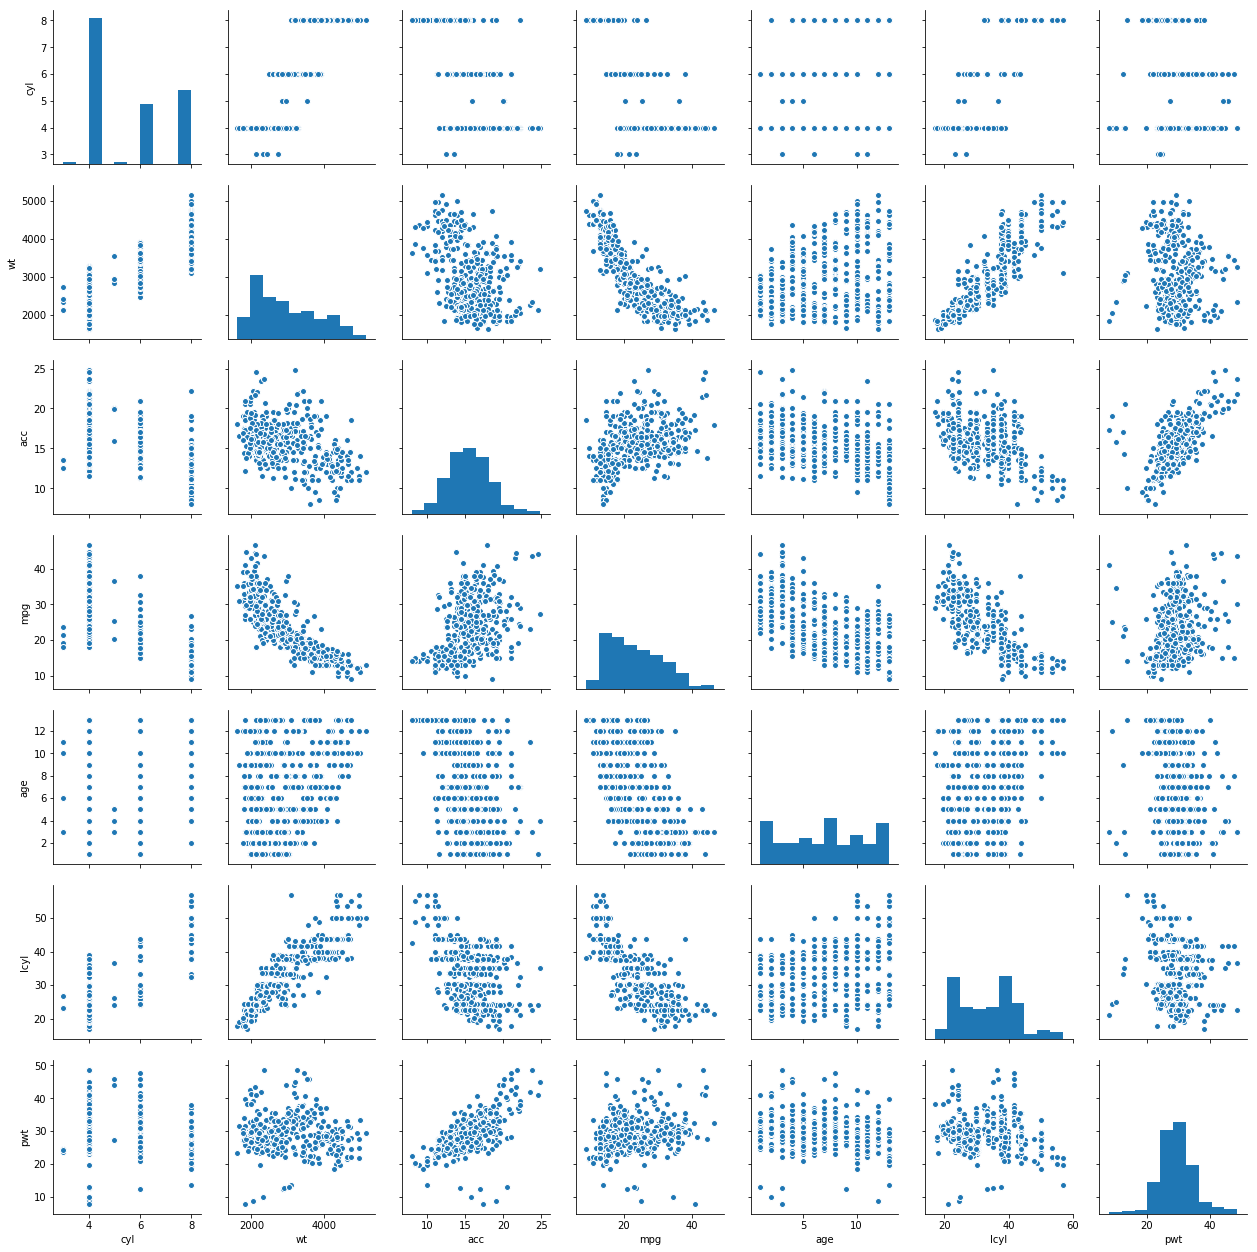

In [28]:
import seaborn as sns
sns.pairplot(car_df)
# From the pair plot we can visualize three clusters

In [29]:
#first standardizing the dataset using z-score
from scipy.stats import zscore
car_dfz = car_df.apply(zscore)

In [31]:
# Starting with elbow plot to determine the number of cluster. based on decriptive analysis, we should have three
# clusters
from sklearn.cluster import KMeans
distortion = []
cluster_range = range( 1, 10)
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_dfz)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  distortion.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortion } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2786.000000
1,2,1598.271502
2,3,1260.616442
3,4,1041.921646
4,5,915.566950
5,6,830.762597
6,7,790.124839
7,8,712.917471
8,9,663.466942


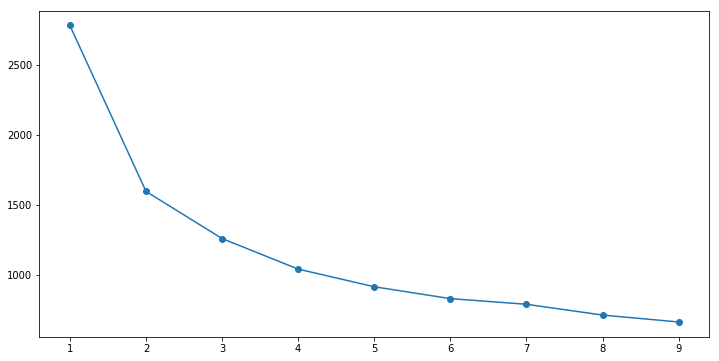

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [33]:
#Considering there are three clusters
car_cluster = KMeans( n_clusters = 3, random_state = 1234 )
car_cluster.fit(car_dfz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [34]:
car_df['k_3'] = car_cluster.predict(car_dfz)

In [36]:
car_df['k_3'].value_counts()

1    197
0    101
2    100
Name: k_3, dtype: int64

In [37]:
#Considering there are four clusters
car_cluster = KMeans( n_clusters = 4, random_state = 1234 )
car_cluster.fit(car_dfz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [38]:
car_df['k_4'] = car_cluster.predict(car_dfz)
car_df['k_4'].value_counts()

3    107
0    104
1     99
2     88
Name: k_4, dtype: int64

In [39]:
car_df

,cyl,wt,acc,mpg,age,lcyl,pwt,k_3,k_4
0,8,3504,12.0,18.0,13,38.375000,26.953846,0,1
1,8,3693,11.5,15.0,13,43.750000,22.381818,0,1
2,8,3436,11.0,18.0,13,39.750000,22.906667,0,1
3,8,3433,12.0,16.0,13,38.000000,22.886667,0,1
4,8,3449,10.5,17.0,13,37.750000,24.635714,0,1
5,8,4341,10.0,15.0,13,53.625000,21.924242,0,1
6,8,4354,9.0,14.0,13,56.750000,19.790909,0,1
7,8,4312,8.5,14.0,13,55.000000,20.055814,0,1
8,8,4425,10.0,14.0,13,56.875000,19.666667,0,1
9,8,3850,8.5,15.0,13,48.750000,20.263158,0,1


In [ ]:
# We should have three clusters. Those are equally distributed.

In [43]:
car_df = car_df.drop(['k_4'],axis=1)

In [45]:
# creating three datafames of each cluster
car_df0 = car_df[car_df['k_3'].isin(['0'])]

In [47]:
car_df1 = car_df[car_df['k_3'].isin(['1'])]
car_df2 = car_df[car_df['k_3'].isin(['2'])]

In [49]:
#Running multi linear regression to predict the mpg of each cluster
x0 = car_df0.drop(['mpg','k_3'],axis=1)

In [50]:
y0 = car_df0['mpg']

In [55]:
y0 = y0.values.reshape(-1,1)

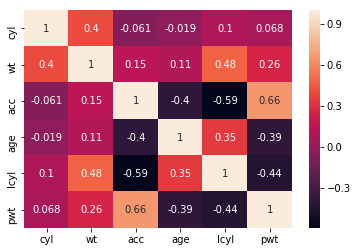

In [67]:
sns.heatmap( x0.corr(), annot=True)

In [68]:
x0z = x0.apply(zscore)

In [75]:
from sklearn.model_selection import train_test_split
x_train0, x_test0, y_train0, y_test0 = train_test_split(x0z, y0, test_size=0.3, random_state = 2)

In [76]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train0, y_train0)
#petroldf_new = X,linreg.coef_
print('Coeffcient is :', linreg.coef_)

Coeffcient is : [[-0.34702438 -0.98747505 -0.86314286 -1.1857726  -0.20665995  0.6385074 ]]


In [78]:
test_acc = linreg.score(x_train0, y_train0)
print ('Accuracy value for test dataset is', test_acc)

Accuracy value for test dataset is 0.6589883205887384


In [62]:
# Running linear regression on second cluster
x1 = car_df1.drop(['mpg','k_3'],axis=1)
y1 = car_df1['mpg']
y1 = y1.values.reshape(-1,1)

In [63]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state = 1)
linreg = LinearRegression()
linreg.fit(x_train1, y_train1)
#petroldf_new = X,linreg.coef_
print('Coeffcient is :', linreg.coef_)
test_acc = linreg.score(x_test1, y_test1)
print ('Accuracy value for test dataset is', test_acc)

Coeffcient is : [[-0.17896248 -0.00980442  0.23394985 -0.8783791  -0.09294599  0.10324301]]
Accuracy value for test dataset is 0.6132154630322815


In [64]:
# Running linear regression on third cluster
x2 = car_df2.drop(['mpg','k_3'],axis=1)
y2 = car_df2['mpg']
y2 = y2.values.reshape(-1,1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state = 1)
linreg = LinearRegression()
linreg.fit(x_train2, y_train2)
#petroldf_new = X,linreg.coef_
print('Coeffcient is :', linreg.coef_)
test_acc = linreg.score(x_test2, y_test2)
print ('Accuracy value for test dataset is', test_acc)

Coeffcient is : [[ 0.35150391 -0.00694969 -0.04650765 -0.8172516  -0.05591471  0.29006465]]
Accuracy value for test dataset is 0.5611695677486468


In [ ]:
# Though I did the exercise as requested but the accuracy is coming very low while predicting the miles per gallon for
# the cluster. Can you please help where i am going wrong.